<a href="https://colab.research.google.com/github/Szczureczek1983/Repozytorium2/blob/main/Market_segmentation_365.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [ ]:
data = pd.read_csv('/content/3.12.+Example.csv')

In [ ]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Brand loyalty:

purchases for 1y + other factors
there is no widely accepted technique to measure it but there are proxies like churn rate, retention rate or customer lifetime value (CLV).
type of data: continous
range( -2.5 to 2.5)

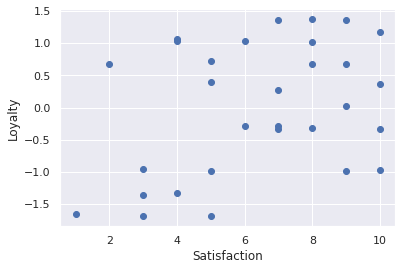

In [ ]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()


In [ ]:
X = data.copy()

In [ ]:
kmeans = KMeans(2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [ ]:
clusters = X.copy()
clusters['Cluster_pred'] = kmeans.fit_predict(X)

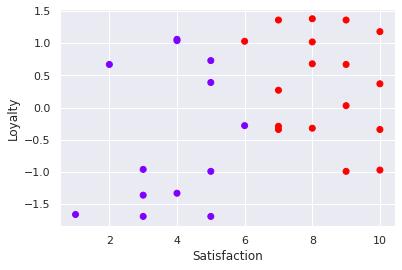

In [ ]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'], c=clusters['Cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

Most probably the algorithm ONLY considered satisfaction as a feature (because we did not standarized variable)
Whenever we cluster on the basis of a single feature, the result looks like this graph



In [ ]:
# Standarization of variables
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

X_scaled contains the standardized 'Satisfaction' and the same values for 'Loyalty' 

In [ ]:
# take advantage of the Elbow method
wcss = []
for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
wcss

[59.999999999999986,
 30.35236058808774,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.589288254024856,
 5.43875645372026,
 4.528197943795291,
 3.687975963852466]

We will get the WCSS for 1 to 9-cluster solutions(completely arbitrarily chosen number)

Text(0, 0.5, 'WCSS')

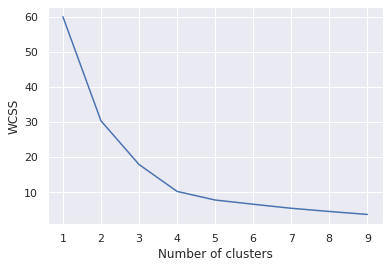

In [ ]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Given this graph, think about the number of clusters we should use

In [ ]:
# Explore clustering solutions and select the number of clusters
kmeans_two = KMeans(2)
kmeans_two.fit(X_scaled)
clusters_two = X.copy()
clusters_two['cluster_pred'] = kmeans_two.fit_predict(X_scaled)


In [ ]:
clusters_two

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,1
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


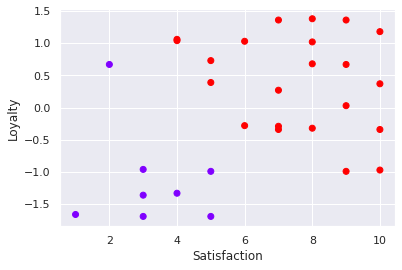

In [ ]:
plt.scatter(clusters_two['Satisfaction'],clusters_two['Loyalty'], c=clusters_two['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

Keeping the original x-axis we get an intuition for HOW SATISFIED WERE THE CUSTOMERS.

We often choose to plot using the original values for clearer interpretability.
NOTE: the discrepancy we observe here depends on the range of the axes, too.

In [ ]:
kmeans_three = KMeans(3)
kmeans_three.fit(X_scaled)
clusters_three = X.copy()
clusters_three['cluster_pred'] = kmeans_three.fit_predict(X_scaled)
clusters_three

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


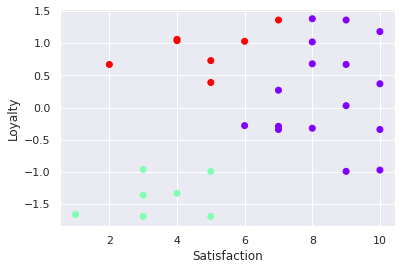

In [ ]:
plt.scatter(clusters_three['Satisfaction'],clusters_three['Loyalty'], c=clusters_three['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [ ]:
kmeans_four = KMeans(4)
kmeans_four.fit(X_scaled)
clusters_four = X.copy()
clusters_four['cluster_pred'] = kmeans_four.fit_predict(X_scaled)
clusters_four

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,2
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,3
9,8,0.68,3


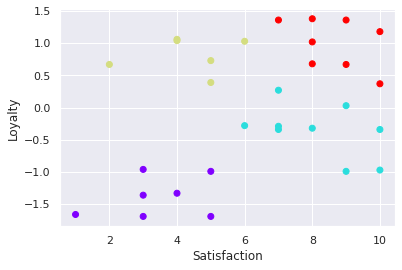

In [ ]:
plt.scatter(clusters_four['Satisfaction'],clusters_four['Loyalty'], c=clusters_four['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [ ]:
kmeans_five = KMeans(5)
kmeans_five.fit(X_scaled)
clusters_five = X.copy()
clusters_five['cluster_pred'] = kmeans_five.fit_predict(X_scaled)
clusters_five

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,4
2,5,-0.99,0
3,7,-0.29,4
4,4,1.06,2
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,4
8,8,1.02,3
9,8,0.68,3


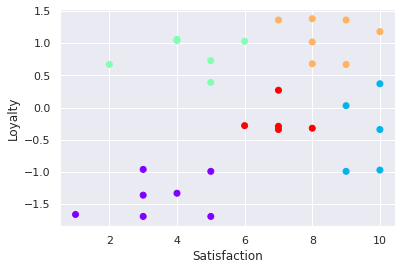

In [ ]:
plt.scatter(clusters_five['Satisfaction'],clusters_five['Loyalty'], c=clusters_five['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

How is clustering actually useful?
Types of analysis
- Exploratory
  - get acquainted with the data
  - Search for patterns
  - Plan
- Confirmatory
- Explanatory

Confirmatory and explanatory analysis:
- Explain a phenomenon
- Confirm a hypothesis
- Validate previous research


Clustering of clustering
types of clustering:
- Flat
  - k-means
- Hierarchical
 example: Taxonomy of the animal kingdom
 types of hierarchical clustering
- agglomerative (bottom-up)
- divisive (top-down)

Pros:

1. Hierarchical clustering shows all the possible linkages between clusters
2. We understand the data much, much better
3. No need to preset the number of clusters (like with k-means)
4. Many methods to perform hierarchical clustering(exp: Ward)

Con:
1. scalability 

